https://nbviewer.org/github/jmportilla/Udemy---Machine-Learning/blob/master/Supervised%20Learning%20-%20Logistic%20Regression.ipynb

In [1]:
# Data Imports
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

# Math
import math

# Plot imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Machine Learning Imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# For evaluating our ML results
from sklearn import metrics

# Dataset Import
import statsmodels.api as sm


Text(0.5, 1.0, ' Logistic Function ')

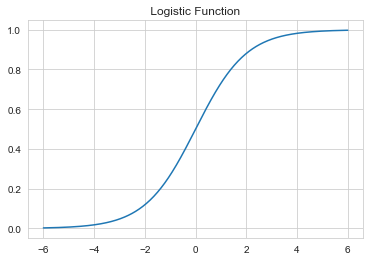

In [2]:
# Logistic Function
def logistic(t):
    return 1.0 / (1 + math.exp((-1.0)*t) )

# Set t from -6 to 6 ( 500 elements, linearly spaced)
t = np.linspace(-6,6,500)

# Set up y values (using list comprehension)
y = np.array([logistic(ele) for ele in t])

# Plot
plt.plot(t,y)
plt.title(' Logistic Function ')

In [3]:
df = sm.datasets.fair.load_pandas().data

In [4]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [5]:
def affair_check(x):
    if x !=0:
        return 1
    else:
        return 0

df['had_affair'] = df.affairs.apply(affair_check)
    

In [9]:
df[df.had_affair==0]

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,had_affair
2053,4.0,32.0,9.0,2.0,3.0,14.0,2.0,4.0,0.0,0
2054,4.0,27.0,6.0,0.0,2.0,14.0,3.0,4.0,0.0,0
2055,4.0,22.0,2.5,0.0,2.0,14.0,3.0,2.0,0.0,0
2056,5.0,42.0,23.0,4.0,3.0,16.0,3.0,5.0,0.0,0
2057,5.0,27.0,2.5,1.0,3.0,20.0,2.0,2.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.0,0
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.0,0
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.0,0
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.0,0


In [10]:
df.groupby('had_affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
had_affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


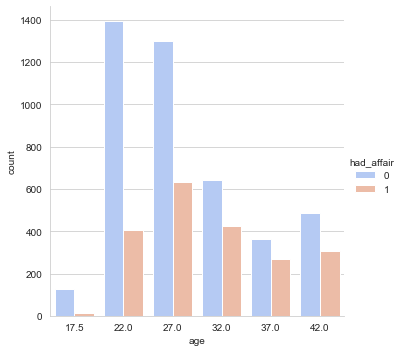

In [15]:
sns.catplot(x='age',data=df,hue='had_affair',kind='count',palette='coolwarm')

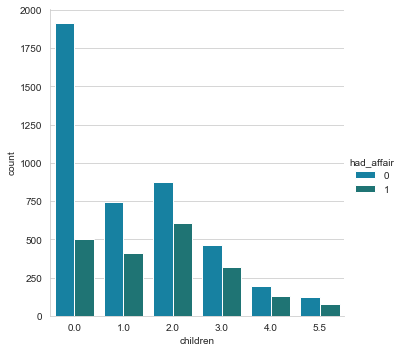

In [19]:
sns.catplot(x='children',kind='count',hue='had_affair',data=df,palette='winter_d')

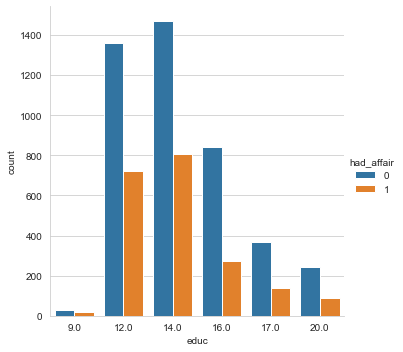

In [20]:
sns.catplot(x='educ',kind='count',hue='had_affair',data=df)

 rate_marriage   : How rate marriage, 1 = very poor, 2 = poor, 3 = fair,
                    4 = good, 5 = very good
    age             : Age
    yrs_married     : No. years married. Interval approximations. See
                    original paper for detailed explanation.
    children        : No. children
    religious       : How relgious, 1 = not, 2 = mildly, 3 = fairly,
                    4 = strongly
    educ            : Level of education, 9 = grade school, 12 = high
                    school, 14 = some college, 16 = college graduate,
                    17 = some graduate school, 20 = advanced degree
    occupation      : 1 = student, 2 = farming, agriculture; semi-skilled,
                    or unskilled worker; 3 = white-colloar; 4 = teacher
                    counselor social worker, nurse; artist, writers;
                    technician, skilled worker, 5 = managerial,
                    administrative, business, 6 = professional with
                    advanced degree
    occupation_husb : Husband's occupation. Same as occupation.
    affairs         : measure of time spent in extramarital affairs


In [101]:
occ_dummies = pd.get_dummies(df['occupation'])

In [102]:
hus_occ_dummies = pd.get_dummies(df['occupation_husb'])

In [103]:
occ_dummies

,1.0,2.0,3.0,4.0,5.0,6.0
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,1,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
6361,0,0,0,1,0,0
6362,0,0,0,0,1,0
6363,0,0,1,0,0,0
6364,0,0,1,0,0,0


In [104]:
hus_occ_dummies

,1.0,2.0,3.0,4.0,5.0,6.0
0,0,0,0,0,1,0
1,0,0,0,1,0,0
2,0,0,0,0,1,0
3,0,0,0,0,1,0
4,0,0,0,1,0,0
...,...,...,...,...,...,...
6361,0,0,1,0,0,0
6362,0,0,0,0,1,0
6363,1,0,0,0,0,0
6364,0,0,0,1,0,0


In [105]:
occ_dummies.columns = ['occ1','occ2','occ3','occ4','occ5','occ6']

In [106]:
hus_occ_dummies.columns = ['hocc1','hocc2','hocc3','hocc4','hocc5','hocc6']

In [107]:
X = df.drop(['occupation','occupation_husb','had_affair'],axis=1)

In [108]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666


In [109]:
dummies = pd.concat([occ_dummies,hus_occ_dummies],axis=1)

In [110]:
dummies.head()

,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,0,1,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0,1,0,0


In [111]:
X = pd.concat([X,dummies],axis=1)

In [112]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111,0,1,0,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769,0,0,1,0,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000,0,0,1,0,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273,0,0,0,0,1,0,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666,0,0,1,0,0,0,0,0,0,1,0,0


In [113]:
Y = df.had_affair

In [114]:
Y.tail()

6361    0
6362    0
6363    0
6364    0
6365    0
Name: had_affair, dtype: int64

In [115]:
X = X.drop('occ1',axis=1)
X = X.drop('hocc1',axis=1)

In [116]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs,occ2,occ3,occ4,occ5,occ6,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111,1,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769,0,1,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000,0,1,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273,0,0,0,1,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666,0,1,0,0,0,0,0,1,0,0


In [117]:
X = X.drop(['affairs'],axis=1)

In [118]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,occ2,occ3,occ4,occ5,occ6,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,1,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,0,1,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0,0,0,1,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0


In [119]:
# Y needs to be a 1d array for us to us sklearn

In [120]:
Y = np.ravel(Y)

In [129]:
Y

array([1, 1, 1, ..., 0, 0, 0])

In [130]:
log_model = LogisticRegression(max_iter=1000)

In [131]:
log_model.fit(X,Y)

LogisticRegression(max_iter=1000)

In [132]:
log_model.score(X,Y)

0.7260446120012567

In [133]:
Y.mean() #null errror rate

0.3224945020420987

In [134]:
coeffdf = DataFrame(zip(X.columns,np.transpose(log_model.coef_)))

In [136]:
coeffdf.sort_values

<bound method DataFrame.sort_values of                 0                         1
0   rate_marriage     [-0.7090247383016162]
1             age   [-0.060794428725212665]
2     yrs_married     [0.10770814498343709]
3        children    [0.015636010475839422]
4       religious     [-0.3745584521297461]
5            educ  [-0.0012829951895623494]
6            occ2     [0.05381830552056392]
7            occ3     [0.36641608797129527]
8            occ4     [0.13282421240736828]
9            occ5      [0.7132298300202177]
10           occ6      [0.7465142484050195]
11          hocc2      [0.1637187605007004]
12          hocc3     [0.27515367275240427]
13          hocc4     [0.13581221071201108]
14          hocc5      [0.1656152137597678]
15          hocc6     [0.17706357984048307]>

In [137]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y)

In [139]:
log_model2 = LogisticRegression(max_iter=10000)
log_model2.fit(X_train,Y_train)

LogisticRegression(max_iter=10000)

In [140]:
class_predict = log_model2.predict(X_test)

In [141]:
metrics.accuracy_score(Y_test,class_predict)

0.7198492462311558